In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
!wget https://github.com/ComputoCienciasUniandes/FISI2026-201910/raw/master/Talleres/Grupo_1/dos_picos_1.dat

--2019-05-24 21:17:56--  https://github.com/ComputoCienciasUniandes/FISI2026-201910/raw/master/Talleres/Grupo_1/dos_picos_1.dat
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2026-201910/master/Talleres/Grupo_1/dos_picos_1.dat [following]
--2019-05-24 21:17:57--  https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2026-201910/master/Talleres/Grupo_1/dos_picos_1.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5053 (4,9K) [text/plain]
Saving to: ‘dos_picos_1.dat.2’

dos_picos_1.dat.2   100%[===================>]   4,93K  --.-KB/s    in 0s      

2019-05-24 21:17:57 (35,1 MB/s) - ‘dos_picos_1.d

In [3]:
data = np.loadtxt("dos_picos_1.dat")

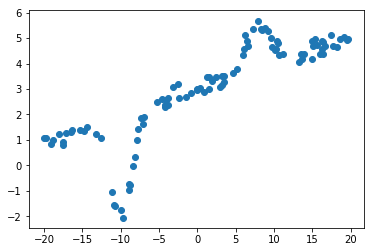

In [4]:
plt.scatter(data[:,0], data[:,1])

In [5]:
x = data[:,0]
y = data[:,1]

In [6]:
def recta(x, m, b):
    return m * x + b

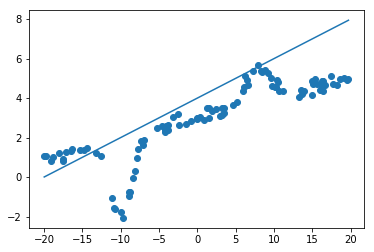

In [7]:
y_r = recta(x, 0.2, 4)
plt.scatter(x,y)
plt.plot(x,y_r)

A la función orignal le agregamos dos picos gaussianos.

In [8]:
def gauss (x,m,b,A,mu,sigma,A2,mu2,sigma2):
    y = m*x+b + A*np.exp(-(x-mu)**2/(2*sigma**2))+A2*np.exp(-(x-mu2)**2/(2*sigma2**2))
    return y 


In [9]:
l=gauss(x,0.1,3,2,7,2,-3,-11,3)

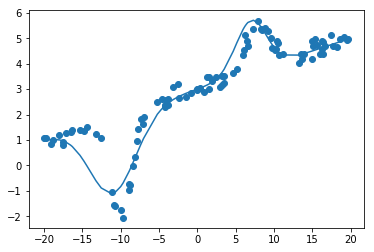

In [10]:
plt.scatter(x,y)
plt.plot(x,l)

Luego le decimos que intente hacer el ajuste de los parámetros.

In [11]:
curve_fit(gauss,x,y)

(array([ 1.44925994e-01, -4.98618120e+01,  6.96896825e+02, -2.58090511e+01,
        -3.40298299e+03, -6.44225381e+02,  1.65895002e+00,  4.86555369e+03]),
 array([[ 5.48754694e+03, -8.04423401e+06,  6.06229954e+07,
         -4.02864035e+07,  2.95667959e+09, -5.24798432e+07,
          1.71056235e+06, -9.61624133e+09],
        [-8.03852033e+06,  4.34233097e+12, -5.44161828e+12,
         -1.65057846e+11, -4.63841623e+12,  1.09933435e+12,
         -2.03144047e+10,  5.25053677e+13],
        [ 6.05303574e+07, -5.44194920e+12,  9.16550907e+13,
          3.30469842e+11, -1.42760176e+14, -8.62127070e+13,
          6.15471266e+10,  6.92951603e+13],
        [-4.02875445e+07, -1.64986478e+11,  3.29247561e+11,
          5.36190375e+11, -8.99337159e+12, -1.65189877e+11,
         -2.42201475e+09,  2.64948466e+13],
        [ 2.95683675e+09, -4.63905247e+12, -1.42740705e+14,
         -8.99520538e+12,  2.79586637e+15,  1.47422376e+14,
          1.37708509e+12, -8.29385102e+15],
        [-5.23929179e+07, 

In [12]:
popt, pcov = curve_fit(gauss,x,y)

In [13]:
yopt=gauss(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7])

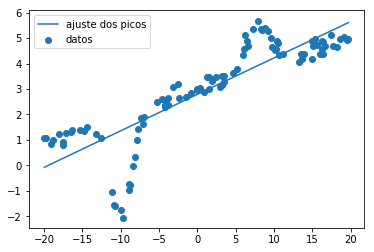

In [14]:
plt.scatter(x,y, label="datos")
plt.plot(x,yopt, label="ajuste dos picos")
plt.legend(loc=0)

Salió terrible.

El módulo scipy.optimize.curve_fit inicia todos los parámetros en 1.0. Así que las dos gaussianas estarán superpuestas.

Podemos ingresar parámetros iniciales que le faciliten al módulo buscar los parámetros óptimos. Los guardamos en la lista

In [15]:
p_iniciales= [0.1,3,2,7,2,-3,-11,3]

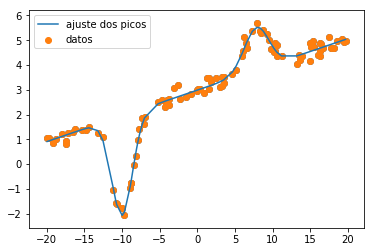

In [16]:
popt, pcov = curve_fit(gauss,x,y,p0=p_iniciales)

yopt=gauss(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7])
plt.scatter(x,y)

plt.scatter(x,y, label="datos")
plt.plot(x,yopt, label="ajuste dos picos")
plt.legend(loc=0)

In [17]:
popt 


array([ 0.10385493,  2.98584905,  1.70673562,  7.86749833,  1.63594501,
       -4.01437077, -9.99274185,  1.38119666])

# Punto 2

In [18]:
!wget https://github.com/ComputoCienciasUniandes/FISI2026-201910/raw/master/Talleres/Grupo_1/munich_temperatures_average_with_bad_data.txt

--2019-05-24 21:18:00--  https://github.com/ComputoCienciasUniandes/FISI2026-201910/raw/master/Talleres/Grupo_1/munich_temperatures_average_with_bad_data.txt
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2026-201910/master/Talleres/Grupo_1/munich_temperatures_average_with_bad_data.txt [following]
--2019-05-24 21:18:01--  https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2026-201910/master/Talleres/Grupo_1/munich_temperatures_average_with_bad_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125482 (123K) [text/plain]
Saving to: ‘munich_temperatures_average_with_bad_data.txt.4’

munich_

In [19]:
munich = np.loadtxt("munich_temperatures_average_with_bad_data.txt")

In [20]:
time = munich[:,0]
Temp = munich[:,1]

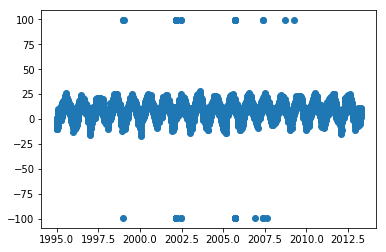

In [21]:
plt.scatter(time, Temp)

In [22]:
Temp.max()

99.0

In [23]:
Temp.min()

-99.0

Los datos vienen con errores, (temperaturas de +/- 99ºC), errores de medición o calibración del equipo. Eliminamos los puntos donde el valor absoluto de la temperatura sea mayor a 50ºC

In [24]:
np.where((abs(Temp[:])<50))

(array([   0,    1,    2, ..., 6676, 6677, 6678]),)

In [25]:
indice=np.where(abs(Temp)<50)

In [26]:
Temp[indice]

array([ 0.944444, -1.61111 , -3.55556 , ..., 10.5556  ,  8.94444 ,
       11.1667  ])

In [27]:
time[indice]

array([1995.00274, 1995.00548, 1995.00821, ..., 2013.27926, 2013.282  ,
       2013.28474])

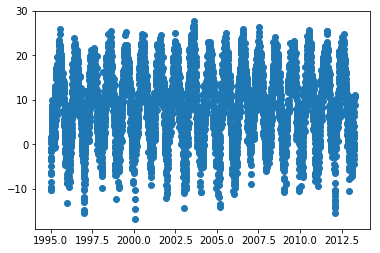

In [28]:
plt.scatter(time[indice],Temp[indice])

In [29]:
T = Temp[indice]
x = time[indice]

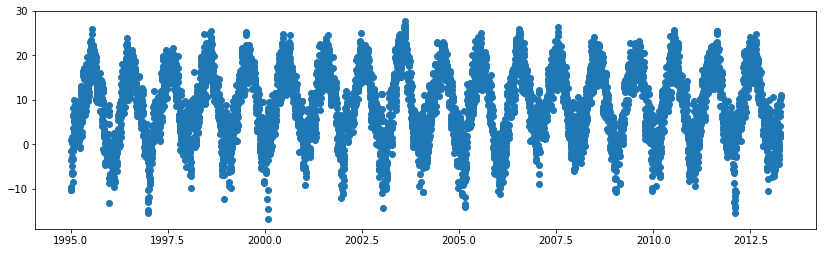

In [30]:
fig = plt.figure(figsize=(14,4))
plt.scatter(x,T)

Ahora hacemos el ajuste. Primero definimos la función de ajuste

In [31]:
def f (x,a,b,c,d,s):
    y = a * np.cos( b * x ) + c * np.sin( d * x ) + s
    return y

Podemos hacer una prueban con parámetros iniciales. Como queremos que tenga periodicidad de un año, y el tiempo está en años, $b$ y $c$ pueden ser $2\pi$. 

In [49]:
y_prueba = f ( x, 20, 2*np.pi, 20, 2*np.pi ,5)

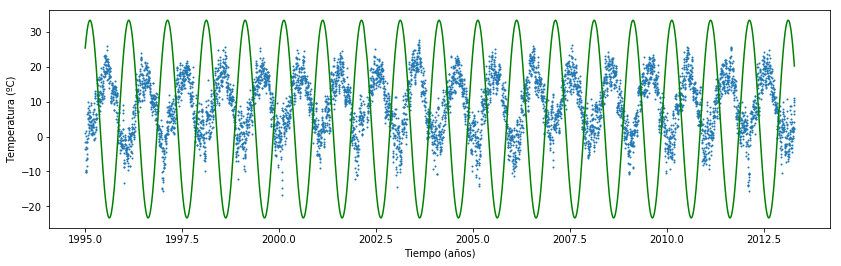

In [50]:
fig = plt.figure(figsize=(14,4))
plt.xlabel("Tiempo (años)")
plt.ylabel("Temperatura (ºC)")
plt.plot( x, y_prueba,c="green")
plt.scatter(x,T,s=1)

Ahora realizamos el ajuste.

In [45]:
popt, pcov = curve_fit(f,x,T,p0=[20,2*np.pi,20,2*np.pi,5])
print(popt)

[30.05135252  6.28365878 34.89974884  6.28274063  9.04160806]


In [46]:
Tajuste = f(x, popt[0] ,  popt[1]  ,  popt[2],  popt[3],  popt[4])

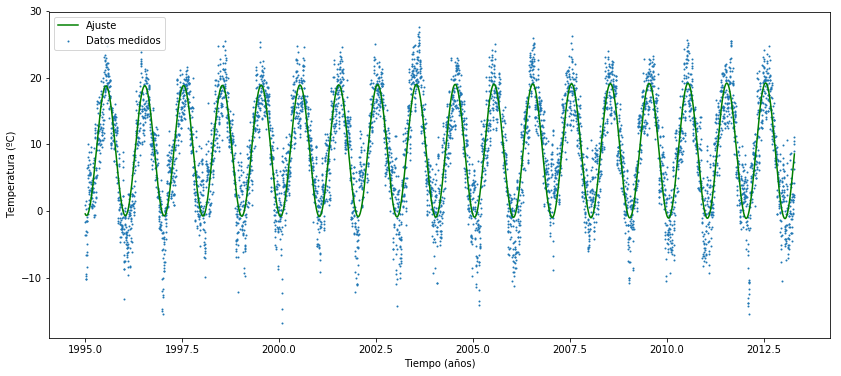

In [48]:
fig = plt.figure(figsize=(14,6))
plt.xlabel("Tiempo (años)")
plt.ylabel("Temperatura (ºC)")

plt.plot(x,Tajuste,c="green", label="Ajuste")
plt.scatter(x,T,s=1, label="Datos medidos")
plt.legend(loc=0)

In [37]:
2 * np.pi

6.283185307179586

En efecto, hay una periodicidad cercana a un año, frecuencia $\omega = 2 \pi$